**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [Dataset](#toc1_2_)    
- [Initial exploration](#toc1_3_)    
- [Intro to the statsmodels package (Documentation) ](#toc1_4_)    
- [Fitting a linear regression model](#toc1_5_)    
- [Categorical explanatory variables](#toc1_6_)    
- [Making predictions using the fitted model](#toc1_7_)    
- [Some important model attributes (Fitted values and Residuals)](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*Linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X.*

The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. (This term should be distinguished from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.)

It is a means of exploring the variation in some quantity (dependent variable) in relation to others (independent variables). A major objective of linear regression is to separate the variation of the dependent variable into "explained" (by the independent variables) and "unexplained" components.

Regression lets you predict the values of a response variable from known values of explanatory variables. Which variable you use as the response variable depends on the question you are trying to answer, but in many datasets, there will be an obvious choice for variables that would be interesting to predict.

### <a id='toc1_2_'></a>[Dataset](#toc0_)

- Taiwan real estate dataset contains the following columns--
  - dist_to_mrt_station_m: Distance to nearest MRT metro station, in meters.
  - n_convenience: No. of convenience stores in walking distance.
  - house_age_years: The age of the house, in years, in three groups.
  - price_twd_msq: House price per unit area, in New Taiwan dollars per meter squared.

In [3]:
taiwan_real_estate = pd.read_csv("./datasets/taiwan_real_estate2.csv")

### <a id='toc1_3_'></a>[Initial exploration](#toc0_)

In [4]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [5]:
taiwan_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


In [6]:
# The "house_age_years" column is object type. Let's explore it further.
taiwan_real_estate.house_age_years.value_counts()

house_age_years
0 to 15     190
15 to 30    129
30 to 45     95
Name: count, dtype: int64

In [7]:
# We can convert it to a category type and we can also map these categories to numbers. 
# For now we will just convert it to a category type.
taiwan_real_estate["house_age_years"] = taiwan_real_estate.house_age_years.astype("category")

In [8]:
taiwan_real_estate.describe()

,dist_to_mrt_m,n_convenience,price_twd_msq
count,414.000000,414.000000,414.000000
mean,1083.885689,4.094203,11.491738
std,1262.109595,2.945562,4.116940
min,23.382840,0.000000,2.299546
25%,289.324800,1.000000,8.381241
50%,492.231300,4.000000,11.633888
75%,1454.279000,6.000000,14.099849
max,6488.021000,10.000000,35.552194


- Before running any statistical models, it's usually a good idea to visualize your dataset.

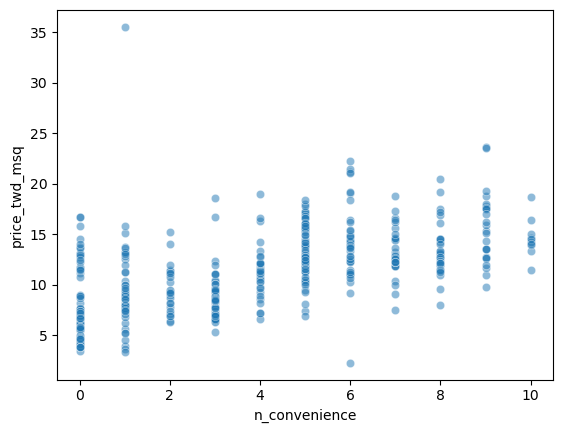

In [9]:
# for now we will limit our exploration to relations between "price_twd_msq" and "n_convenience"
# let's plot a simple scatterplot
# since "price_twd_msq" is int type, we use "alpha = 0.5"
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate,
                alpha=0.5)

plt.show()

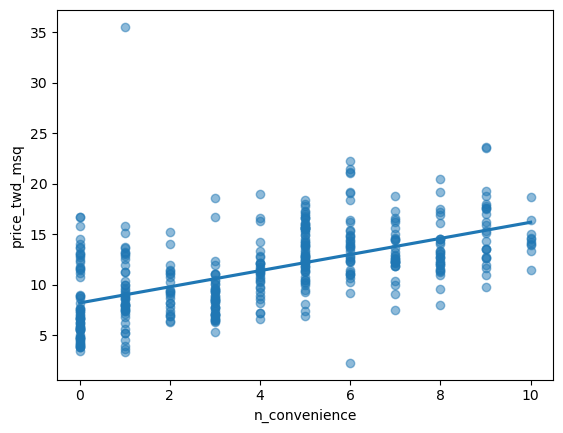

In [10]:
# We can use `sns.regplot()` to plot the data and a linear regression model fit.
# plotting a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

plt.show()

While `sns.regplot()` can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means sometimes you'll need to run a linear regression yourself.

### <a id='toc1_4_'></a>Intro to the statsmodels package ([Documentation](https://www.statsmodels.org/stable/user-guide.html))  [&#8593;](#toc0_)

> Statsmodels uses `endog` and `exog` as names for describing the observed variables that are used in an estimation problem. You are probably more familiar with the terms `dependent` and `independent variables`, respectively. They are often also called `response` and `explanatory variables`, `y` and `x`, or `outcome` and `design`. A mnemonic hint to keep the two terms apart is that exogenous has an “x”, as in x-variable, in its name.

> Importing of modules can be done in multiple ways. See the documentation [here](https://www.statsmodels.org/stable/api-structure.html). 


  - API import for interactive use: initially `from statsmodels import api as sm` is executed. We then go deeper from here on to access the modules and functions.

In [11]:
import statsmodels.api as sm

In [12]:
dir(sm)

['BayesGaussMI',
 'BinomialBayesMixedGLM',
 'ConditionalLogit',
 'ConditionalMNLogit',
 'ConditionalPoisson',
 'Factor',
 'GEE',
 'GLM',
 'GLMGam',
 'GLS',
 'GLSAR',
 'GeneralizedPoisson',
 'HurdleCountModel',
 'Logit',
 'MANOVA',
 'MI',
 'MICE',
 'MICEData',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NegativeBinomialP',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PCA',
 'PHReg',
 'Poisson',
 'PoissonBayesMixedGLM',
 'ProbPlot',
 'Probit',
 'QuantReg',
 'RLM',
 'RecursiveLS',
 'SurvfuncRight',
 'TruncatedLFNegativeBinomialP',
 'TruncatedLFPoisson',
 'WLS',
 'ZeroInflatedGeneralizedPoisson',
 'ZeroInflatedNegativeBinomialP',
 'ZeroInflatedPoisson',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '__version_info__',
 'add_constant',
 'categorical',
 'cov_struct',
 'datasets',
 'distributions',
 'duration',
 'emplike',
 'families',
 'formula',
 'gam',
 'genmod',
 'graphics',
 'iolib',
 'load',
 

In [13]:
dir(sm.regression)

['PytestTester',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_prediction',
 '_tools',
 'linear_model',
 'mixed_linear_model',
 'quantile_regression',
 'recursive_ls',
 'test',
 'yule_walker']

In [14]:
dir(sm.regression.linear_model)

['Appender',
 'Float64Array',
 'GLS',
 'GLSAR',
 'InvalidTestWarning',
 'Literal',
 'OLS',
 'OLSResults',
 'PredictionResults',
 'RegressionModel',
 'RegressionResults',
 'RegressionResultsWrapper',
 'Sequence',
 'ValueWarning',
 'WLS',
 '_ELRegOpts',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_fit_regularized_doc',
 '_get_sigma',
 'annotations',
 'base',
 'bool_like',
 'burg',
 'cache_readonly',
 'cache_writable',
 'cholesky',
 'dtrtri',
 'float_like',
 'lrange',
 'lzip',
 'np',
 'optimize',
 'pinv_extended',
 'pred',
 'stats',
 'string_like',
 'toeplitz',
 'warnings',
 'wrap',
 'yule_walker']

- Direct import for programs: statsmodels `submodules are arranged by topic` (e.g. discrete for discrete choice models, or tsa for time series analysis). Some example imports are given below.

In [15]:
from statsmodels.regression import linear_model

In [16]:
dir(linear_model)

['Appender',
 'Float64Array',
 'GLS',
 'GLSAR',
 'InvalidTestWarning',
 'Literal',
 'OLS',
 'OLSResults',
 'PredictionResults',
 'RegressionModel',
 'RegressionResults',
 'RegressionResultsWrapper',
 'Sequence',
 'ValueWarning',
 'WLS',
 '_ELRegOpts',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_fit_regularized_doc',
 '_get_sigma',
 'annotations',
 'base',
 'bool_like',
 'burg',
 'cache_readonly',
 'cache_writable',
 'cholesky',
 'dtrtri',
 'float_like',
 'lrange',
 'lzip',
 'np',
 'optimize',
 'pinv_extended',
 'pred',
 'stats',
 'string_like',
 'toeplitz',
 'warnings',
 'wrap',
 'yule_walker']

> Another way of using most of the avialable models is to use the `statsmodels.formula.api` module. The `formula.api` hosts many of the same functions found in `api` (e.g. OLS, GLM), but it also holds lower case counterparts for most of these models. 

In general, **lower case** models `accept formula and df arguments`, whereas **upper case** ones `take endog and exog design matrices`. We have to create these design matrices ourselves from the data (usually using the `patsy.dmatrices` function from the `patsy` package). Since we have the data as pandas dataframe we will be using the lower case models from the `statsmodels.formula.api` module.

The `formula` argument accepts a string which describes the model in terms of a `patsy formula` and the `df` argument takes a `pandas data frame`.

*Formula-compatible models have the following generic call signature:* (formula, data, subset=None, *args, **kwargs)

In [17]:
import statsmodels.formula.api as smf

In [18]:
dir(smf)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'conditional_logit',
 'conditional_mnlogit',
 'conditional_poisson',
 'gee',
 'glm',
 'glmgam',
 'gls',
 'glsar',
 'logit',
 'mixedlm',
 'mnlogit',
 'negativebinomial',
 'nominal_gee',
 'ols',
 'ordinal_gee',
 'phreg',
 'poisson',
 'probit',
 'quantreg',
 'rlm',
 'wls']

> Below is an introduction to how the formula strings are constructed. For more details, see the [patsy documentation](https://patsy.readthedocs.io/en/latest/formulas.html).

The general form of a formula is `“y ~ x1 + x2 + ...”`. This formula describes the model `y = β0 + β1x1 + β2x2 + ...`, where `β0` is the intercept and `β1, β2, ...` are the coefficients for the explanatory variables `x1, x2, ...`. If any column is determined to be text strings, it would be treated as a categorical variable. 

- If there's an integer variable that we wanted to treat explicitly as categorical, we can do so by using the `C()` operator i.e, `“C(x1)”`.

- `“x1:x2”` adds a new column to the design matrix with the product of the other two columns. `“x1*x2”` will also include the individual columns that were multiplied together.

- You can apply vectorized functions to the variables in your model e.g, `“np.log(x1)”`. This way you can also apply custom functions to your variables (the custom functions should be vectorized).

### <a id='toc1_5_'></a>[Fitting a linear regression model](#toc0_)

> There are various models avilable for linear regression modeling such as, estimation by ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors.
>
>> See the documentation [here](https://www.statsmodels.org/stable/regression.html) for more details.

In [19]:
# creating the model object using smf.ols
mdl_price_vs_conv = smf.ols(formula="price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# fitting the model
res_price_vs_conv = mdl_price_vs_conv.fit()

In [20]:
type(res_price_vs_conv)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [21]:
# available methods on the fitted model
dir(res_price_vs_conv)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influe

In [22]:
# the parameters of the fitted model
print(res_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house.

- Intercept being 8.224 means that, on average the price of a house with no convenience stores nearby is 8.224 TWD per square meter.
- The model has an n_convenience coefficient of 0.798. This means that, if you increase the nearby convenience stores by 1, the price of the house will increase by 0.798 TWD per square meter.

In [23]:
# the summary of the fitted model
print(res_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           3.41e-37
Time:                        20:02:39   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

### <a id='toc1_6_'></a>[Categorical explanatory variables](#toc0_)

In our dataset, the "house_age_years" column is a categorical variable. And simple observation tells that the "price_twd_msq" column is strongly correlated with the "house_age_years" column.

- To visualize the data, scatter plots aren't ideal because "house_age_years" is categorical. Instead, we can draw a histogram for each of the categories.

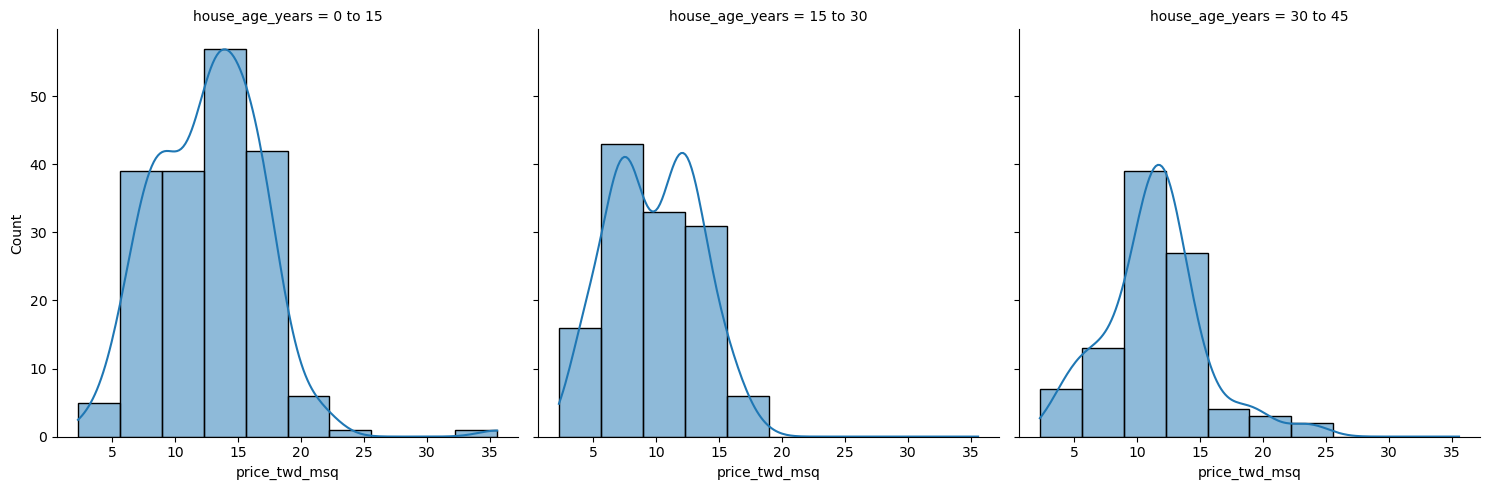

In [24]:
g = sns.displot(data=taiwan_real_estate, x="price_twd_msq", col="house_age_years", kind="hist", element="bars", bins=10, kde=True)
plt.show()

- Some summary statistics

In [25]:
taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

- Fitting a linear regression model

In [26]:
mdl_price_vs_house_age = smf.ols(formula="price_twd_msq ~ house_age_years", data=taiwan_real_estate)
res_price_vs_house_age = mdl_price_vs_house_age.fit()

In [27]:
res_price_vs_house_age.params

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64

This time we have 3 coefficients: an intercept, one for house price category "15 to 30", and one for category "30 to 45". 

- A coefficient for category "0 to 15" is missing, but the number for the intercept looks familiar. The intercept is the mean twd msq price for the "0 to 15" category. 
- You might also wonder why the other coefficients are negative since price can't be negative. The coefficients for each category are calculated relative to the intercept. If you pay close attention you can see that if the coefficients are added to the intercept they equal the mean price for those categories. Now these coefficients make more sense. This way of displaying results can be useful for models with multiple explanatory variables, but for simple linear regression, it's just confusing. Fortunately, we can fix it. By changing the formula slightly to append "plus zero". This way we specify that all the coefficients should be given relative to zero. Equivalently, it means we are fitting a linear regression without an intercept term.

In [28]:
# "+ 0" specifies that all the coefficients should be given relative to zero. 
# Equivalently, it means we are fitting a linear regression without an intercept term.

smf.ols(formula="price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit().params

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

They are all just the mean price for each categories. This is a reassuringly boring result. **When you only have a single, categorical explanatory variable, the linear regression coefficients are simply the means of each category.**

### <a id='toc1_7_'></a>[Making predictions using the fitted model](#toc0_)

Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. For our fitted model above we can call the `.predict(exog=None, transform=True, *args, **kwargs)` to make predictions from the fitted model. `exog` is array_like and defines the values for which you want to predict the response variable. `transform` is a boolean and if `True` (default), applies the model’s `transform` method to `exog` before prediction. See documentation for more details.

In [29]:
# explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# use res_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = res_price_vs_conv.predict(explanatory_data)

# prediction_data (a dataframe that contains both the explanatory data and response data)
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

In [30]:
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


- Visualizing predictions

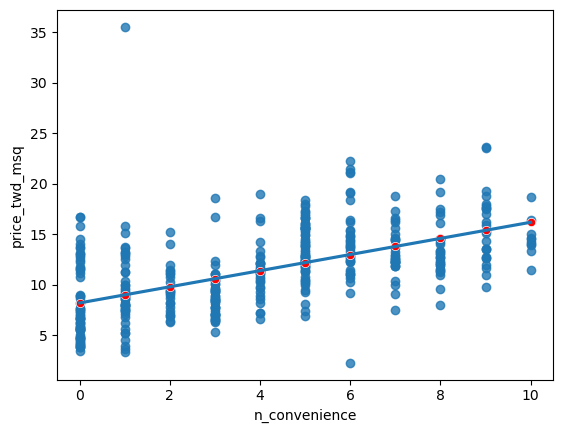

In [31]:
# creating a new figure, fig onto which both the regression plot and the scatter plot will be drawn
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)

# adding a scatter plot layer to the regplot
sns.scatterplot(data=prediction_data, x="n_convenience", y="price_twd_msq", color="red")

# the layered plot
plt.show()

- Limits of predictions

Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. Take the following example:

In [32]:
res_price_vs_conv.predict(pd.DataFrame({"n_convenience": [-1, 2.5]}))

0     7.426158
1    10.219437
dtype: float64

**You need to understand what your data means in order to determine whether a prediction is nonsense or not.**

### <a id='toc1_8_'></a>[Some important model attributes (Fitted values and Residuals)](#toc0_)

We have already seen how to access some of the model attributes in the previous notebook such as, `.params` and `.summary()`.

- The `.fittedvalues` attribute returns the predicted values of the dependent variable on the original dataset used to create the model, i.e. the values of $\hat{y}$ as a pandas Series object. 

    *This is the part of the response variable that is explained by the explanatory variable i.e, the independent variable.*

In [33]:
res_price_vs_conv.fittedvalues

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

In [34]:
# This is equivalent to,
res_price_vs_conv.predict(taiwan_real_estate["n_convenience"])

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

- The `.resid` attribute gives the residuals of the model. "Residuals" are a measure of inaccuracy in the model fit, and are accessed with the resid attribute. Residuals are the difference between the true values of the dependent variable, and the predicted values of the dependent variable. 

    *This is the part of the response variable that is not explained by the independent variable.*

In [35]:
res_price_vs_conv.resid

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

In [36]:
# This is equivalent to,
taiwan_real_estate["price_twd_msq"] - res_price_vs_conv.fittedvalues

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64